## Dataloading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from ast import literal_eval
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.rcParams.update({'font.size': 15})

### Load data

In [2]:
df = pd.read_csv('results.csv', index_col=False)

del df['Unnamed: 0']

a = []

df['target'] = df['target'].apply(literal_eval)
joe = df['target'].values
for v in joe:
    a.append(np.array(v))
joe = np.array(a).argmax(1)
df['target'] = joe

df['mean0'] = df['mean0'].astype('float64')
df['std0'] = df['std0'].astype('float64')
df['mean1'] = df['mean1'].astype('float64')
df['std1'] = df['std1'].astype('float64')
display(df.head())

,target,mean0,std0,mean1,std1,text
0,0,0.999086,0.000652,0.000914,0.000652,...
1,0,0.969981,0.012336,0.030019,0.012336,...
2,1,0.230962,0.083058,0.769038,0.083058,classics and is not only a <UNK> little 20 min...
3,0,0.982669,0.009936,0.017331,0.009936,<UNK> a nerd thing it's just an example of how...
4,1,0.135886,0.054573,0.864114,0.054573,<UNK> travels back towards the hospital but is...


In [3]:
df.dtypes

target      int64
mean0     float64
std0      float64
mean1     float64
std1      float64
text       object
dtype: object

In [4]:
def classify(x, threshold):
    mean = np.array([x['mean0'], x['mean1']])
    std = np.array([x['std0'], x['std1']])
    if (std[mean.argmax()] <= threshold):
        return mean.argmax()
    else:
        return -1

In [5]:
df['std1'].max()

0.14538480546045815

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.66it/s]


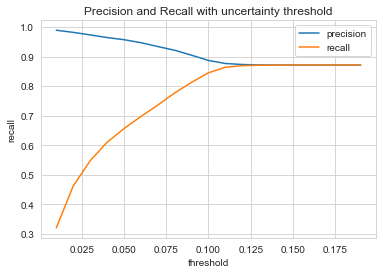

In [6]:
from tqdm import tqdm

sns.set_style('whitegrid')

thresholds = list(np.arange(0,0.2,0.01))
precisions = []
recalls = []

for t in tqdm(thresholds):
    testdf = df
    testdf['test'] = testdf.apply(classify, args=[t], axis=1)
    certain = df[df['test']!=-1]
#     print(len(certain))
    precision = certain['target'] == certain['test']
#     print('precision',precision.mean())
    recall = df['target'] == df['test']
#     print('recall',recall.mean())
    precisions.append(precision.mean())
    recalls.append(recall.mean())

datf = pd.DataFrame({'threshold':thresholds[1:], 'precision':precisions[1:], 'recall':recalls[1:]})
sns.lineplot(data=datf, x='threshold', y='precision')
sns.lineplot(data=datf, x='threshold', y='recall')
plt.title('Precision and Recall with uncertainty threshold')
plt.legend(['precision','recall'])
# plt.set_xlabel('confidence threshold')
# plt.set_ylabel('precision/recall')

In [7]:
datf

,threshold,precision,recall
0,0.01,0.989114,0.31984
1,0.02,0.981961,0.46160
2,0.03,0.973385,0.54712
3,0.04,0.964435,0.60960
4,0.05,0.957161,0.65600
5,0.06,0.947065,0.69704
6,0.07,0.933977,0.73560
7,0.08,0.921340,0.77680
8,0.09,0.904567,0.81288
9,0.10,0.886827,0.84504


In [8]:
i = 0

18
<UNK> performance is enthusiastic but shaky as he carries off the stupid dialogue with the least amount of skill <UNK> has been the highlight of many a bad movie and this is no exception he easily gives the best performance of the movie although i'm compelled to add that the dog who's a pretty darn good actor himself comes in a close second br br all in all an <UNK> dumb movie and yet and yet i watched it three times within a week and yet i can't help liking it hey what can i say i have a taste for junk and michael <UNK> not that i've ever actually <UNK> michael <UNK> i'm sure there are laws against that but any movie that can make me laugh that hard yes even unintentionally can't be all bad <UNK> it up to a guilty pleasure a yes i know it's <UNK> stupid but i like it anyway movie br br it's tough for me to rate this on a normal scale i'm forced to give it a d but on my own personal cheese scale it gets <UNK> up to an a br br yeah i know i'm weird like that
[0.1157381804216487] [0.1

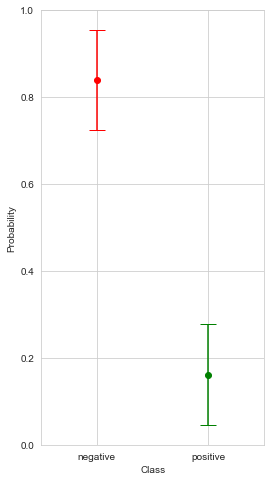

In [30]:
print(i)
s = df.iloc[i]
print(s['text'])
if s['target'] == 0:
    colors = ['green', 'red']
else:
    colors = ['red', 'green']

x_0 = [0]
x_1 = [1]
y_0 = [s['mean0']]
y_1 = [s['mean1']]
err_0 = [s['std0']*2]
err_1 = [s['std1']*2]
print(err_0, err_1)
plt.figure(figsize=(4,8))
plt.errorbar(x_0, y_0, yerr=err_0, fmt='o', capsize=8, color=colors[0])
plt.errorbar(x_1, y_1, yerr=err_1, fmt='o', capsize=8, color=colors[1])

plt.xticks([0, 1], ['negative', 'positive'])
plt.ylim([0,1])
plt.xlim([-0.5, 1.5])
plt.xlabel('Class')
plt.ylabel('Probability')

i += 1

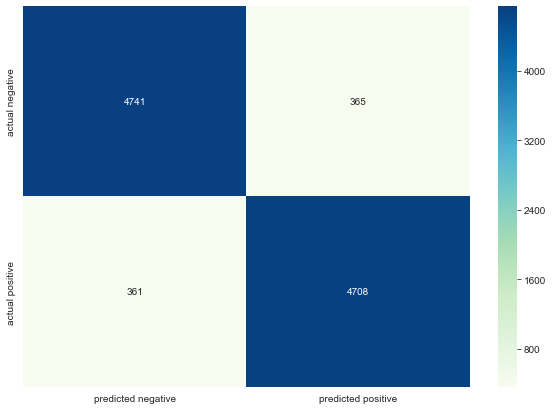

In [10]:
df['y_pred'] = df.apply(classify, args=[0.075], axis=1)

tdf = df[df['y_pred'] != -1]

cm = confusion_matrix(tdf['target'].values, tdf['y_pred'].values)

df_cm = pd.DataFrame(cm, index = ['negative', 'positive'],
                  columns = ['predicted negative', 'predicted positive'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='GnBu')
plt.yticks(np.arange(2)+0.5,['actual negative', 'actual positive'], va='center')
plt.show()

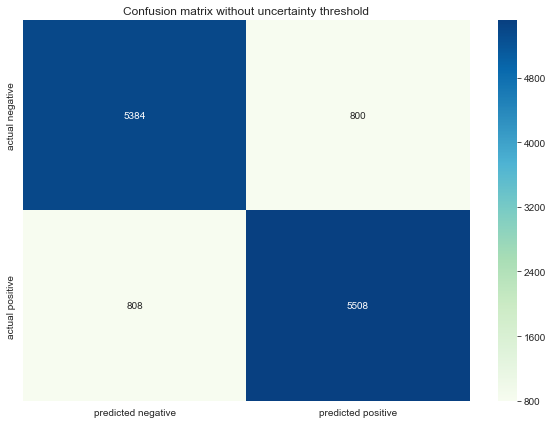

In [12]:
df['y_pred'] = df.apply(classify, args=[1], axis=1)

tdf = df[df['y_pred'] != -1]

cm = confusion_matrix(tdf['target'].values, tdf['y_pred'].values)

df_cm = pd.DataFrame(cm, index = ['negative', 'positive'],
                  columns = ['predicted negative', 'predicted positive'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='GnBu')
plt.yticks(np.arange(2)+0.5,['actual negative', 'actual positive'], va='center')
plt.title('Confusion matrix without uncertainty threshold')
plt.show()